In [1]:
#Jaydeep Sompalli 


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,f1_score,confusion_matrix
import random
%matplotlib inline

In [2]:
#Importing data set 

df = pd.read_csv('Emotion_classify_Data.csv', encoding="utf-8")
df.head(100)

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
95,i am feeling rather grouchy too this morning s...,anger
96,i feel like the earthquake has also shaken the...,fear
97,i might be able to recreate the feeling when i...,anger
98,i woke up feeling positive i was totally in th...,joy


In [3]:
#Encoding Emotion Coloumn 
mapping = {"joy": 2, "fear": 1, "anger": 0}
df["Emotion"] = df["Emotion"].map(mapping)
df.head(100)


,Comment,Emotion
0,i seriously hate one subject to death but now ...,1
1,im so full of life i feel appalled,0
2,i sit here to write i start to dig out my feel...,1
3,ive been really angry with r and i feel like a...,2
4,i feel suspicious if there is no one outside l...,1
...,...,...
95,i am feeling rather grouchy too this morning s...,0
96,i feel like the earthquake has also shaken the...,1
97,i might be able to recreate the feeling when i...,0
98,i woke up feeling positive i was totally in th...,2


In [4]:
#Creating naive bayes classifier 

X = df["Comment"]
y = df["Emotion"]

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=100)

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)


y_pred = naive_bayes.predict(X_test)

# Evaluate the classifier
f1 = f1_score(y_pred, y_test, average="weighted")
print("F1 Score:", f1)



F1 Score: 0.8812213001795313


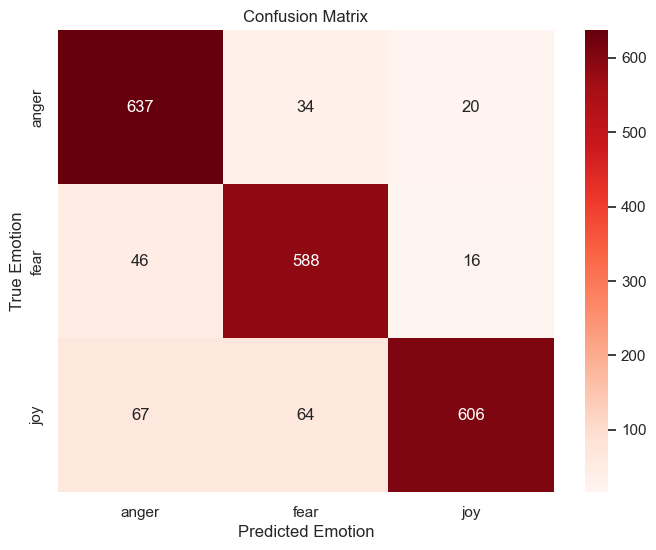

In [5]:
#Plot confusion matrix 
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["anger", "fear", "joy"], yticklabels=["anger", "fear", "joy"])
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.title("Confusion Matrix")
plt.show()

In [6]:
#Prints random 20 keywords used by the classifier

feature_names = list(tfidf_vectorizer.get_feature_names_out())


num_keywords_to_print = 20
random_keywords = random.sample(feature_names, num_keywords_to_print)

print("Example keywords used by the the classifier:")
for keyword in random_keywords:
    print(keyword)

Example keywords used by the the classifier:
md
scared
excelent
dukes
plodded
analyze
rain
than
sing
nesting
bother
artists
observing
judge
pundits
crushes
primaries
pies
car
discussed


In [7]:
#User input allows user to enter a comment to be classified 

new_comments = [input("Enter a comment to be classified: ")]  # Wrap the input in a list
new_comments_tfidf = tfidf_vectorizer.transform(new_comments)
predicted_emotions = naive_bayes.predict(new_comments_tfidf)

if predicted_emotions == 0:
    print("-" * 50)
    print("Predicted Emotion: Anger")
elif predicted_emotions == 1:
    print("-" * 50)
    print("Precicted Emotion: Fear")
elif predicted_emotions == 2:
    print("-" * 50)
    print("Precicted Emotion: Joy")


Enter a comment to be classified: I heard a strange noise in the dark alley, and I think someone's following me.
--------------------------------------------------
Precicted Emotion: Fear
